In [1]:
from osgeo import gdal
from osgeo import ogr
from osgeo import osr
import matplotlib.pyplot as plt
import numpy as np

In [2]:
aster = gdal.Open("E:/ASTER/AST_L1T_00311232019070908_20191124093721_23825.hdf")
bands = []

In [3]:
for sd , des in aster.GetSubDatasets():
    bands.append(sd)
    print(des)

[5041x5665] ImageData2 VNIR_Swath (8-bit unsigned integer)
[5041x5665] ImageData1 VNIR_Swath (8-bit unsigned integer)
[5041x5665] ImageData3N VNIR_Swath (8-bit unsigned integer)
[841x945] ImageData10 TIR_Swath (16-bit unsigned integer)
[841x945] ImageData11 TIR_Swath (16-bit unsigned integer)
[841x945] ImageData12 TIR_Swath (16-bit unsigned integer)
[841x945] ImageData13 TIR_Swath (16-bit unsigned integer)
[841x945] ImageData14 TIR_Swath (16-bit unsigned integer)


In [4]:
bands

['HDF4_EOS:EOS_SWATH:"E:/ASTER/AST_L1T_00311232019070908_20191124093721_23825.hdf":VNIR_Swath:ImageData2',
 'HDF4_EOS:EOS_SWATH:"E:/ASTER/AST_L1T_00311232019070908_20191124093721_23825.hdf":VNIR_Swath:ImageData1',
 'HDF4_EOS:EOS_SWATH:"E:/ASTER/AST_L1T_00311232019070908_20191124093721_23825.hdf":VNIR_Swath:ImageData3N',
 'HDF4_EOS:EOS_SWATH:"E:/ASTER/AST_L1T_00311232019070908_20191124093721_23825.hdf":TIR_Swath:ImageData10',
 'HDF4_EOS:EOS_SWATH:"E:/ASTER/AST_L1T_00311232019070908_20191124093721_23825.hdf":TIR_Swath:ImageData11',
 'HDF4_EOS:EOS_SWATH:"E:/ASTER/AST_L1T_00311232019070908_20191124093721_23825.hdf":TIR_Swath:ImageData12',
 'HDF4_EOS:EOS_SWATH:"E:/ASTER/AST_L1T_00311232019070908_20191124093721_23825.hdf":TIR_Swath:ImageData13',
 'HDF4_EOS:EOS_SWATH:"E:/ASTER/AST_L1T_00311232019070908_20191124093721_23825.hdf":TIR_Swath:ImageData14']

In [5]:
VNIR_1 = gdal.Open(bands[0]).ReadAsArray().astype(float)
VNIR_2 = gdal.Open(bands[1]).ReadAsArray().astype(float)
VNIR_3 = gdal.Open(bands[2]).ReadAsArray().astype(float)
TIR_1 = gdal.Open(bands[3]).ReadAsArray().astype(float)
TIR_2 = gdal.Open(bands[4]).ReadAsArray().astype(float)
TIR_3 = gdal.Open(bands[5]).ReadAsArray().astype(float)
TIR_4 = gdal.Open(bands[6]).ReadAsArray().astype(float)
TIR_5 = gdal.Open(bands[7]).ReadAsArray().astype(float)

In [6]:
np.var(VNIR_1)

3522.383548185367

In [7]:
np.max(VNIR_1)

255.0

In [8]:
np.min(VNIR_1)

0.0

In [9]:
np.mean(VNIR_1)

68.31790610900589

In [10]:
np.sum(VNIR_1)

1950972549.0

In [11]:
NB1 = (VNIR_1-np.min(VNIR_1))/(np.max(VNIR_1)-np.min(VNIR_1))
NB2 = (VNIR_2-np.min(VNIR_2))/(np.max(VNIR_2)-np.min(VNIR_2))
NB3 = (VNIR_3-np.min(VNIR_3))/(np.max(VNIR_3)-np.min(VNIR_3))
NB4 = (TIR_1-np.min(TIR_1))/(np.max(TIR_1)-np.min(TIR_1))
NB5 = (TIR_2-np.min(TIR_2))/(np.max(TIR_2)-np.min(TIR_2))
NB6 = (TIR_3-np.min(TIR_3))/(np.max(TIR_3)-np.min(TIR_3))
NB7 = (TIR_4-np.min(TIR_4))/(np.max(TIR_4)-np.min(TIR_4))
NB8 = (TIR_5-np.min(TIR_5))/(np.max(TIR_5)-np.min(TIR_1))

In [30]:
stack = np.stack([NB1,NB2,NB3],axis=2)

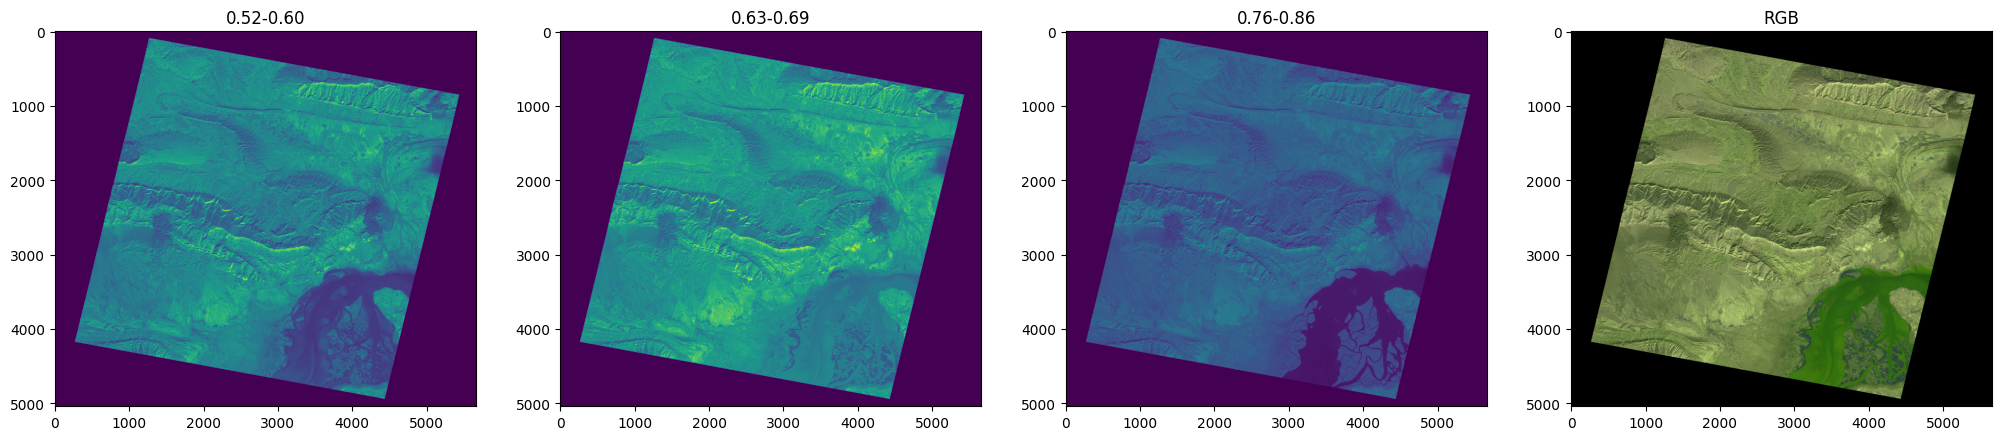

In [31]:
fig ,ax = plt.subplots(nrows=1, ncols=4, figsize=(25,15))
ax[0].imshow(NB1)
ax[0].set_title('0.52-0.60')
ax[1].imshow(NB2)
ax[1].set_title('0.63-0.69')
ax[2].imshow(NB3)
ax[2].set_title('0.76-0.86')
ax[3].imshow(stack)
ax[3].set_title('RGB')
plt.show()

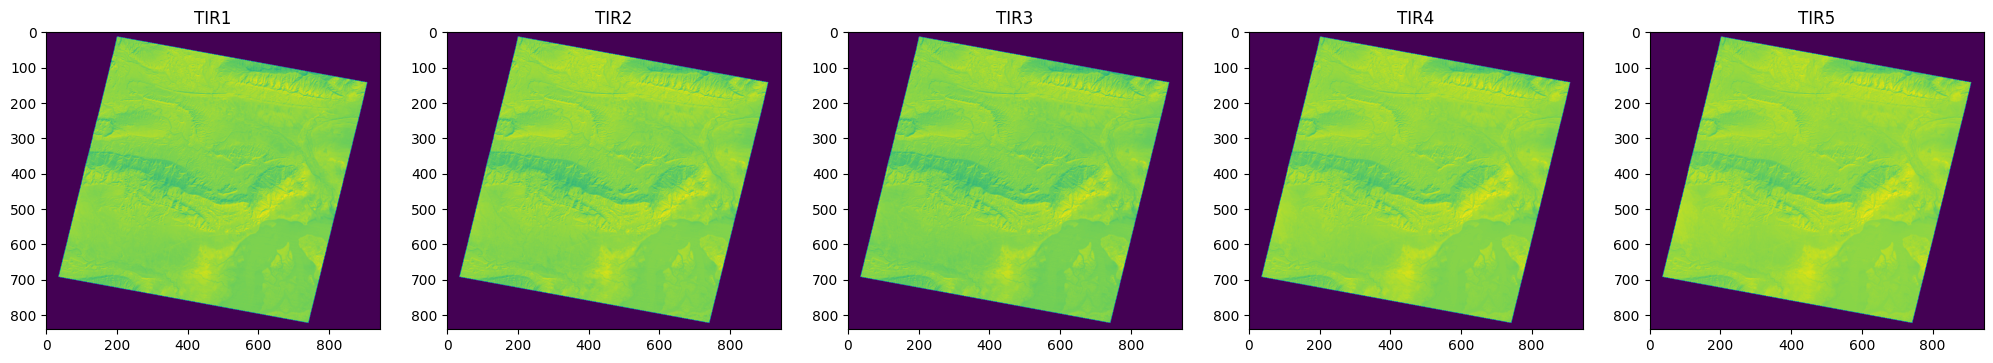

In [32]:
fig ,ax = plt.subplots(nrows=1, ncols=5, figsize=(25,15))
ax[0].imshow(NB4)
ax[0].set_title('TIR1')
ax[1].imshow(NB5)
ax[1].set_title('TIR2')
ax[2].imshow(NB6)
ax[2].set_title('TIR3')
ax[3].imshow(NB7)
ax[3].set_title('TIR4')
ax[4].imshow(NB8)
ax[4].set_title('TIR5')
plt.show()